# Wide binary stars

## Parameters

$$
e = \, \text{Eccentricity} \rightarrow \text{Thermal distribution: }[0, 1] \\
e^2 = \, \text{Eccentricity squared} \rightarrow \text{Uniform distribution: }[0,1] \\
\phi_0 =  \, \text{Initial phase angle} \rightarrow \text{Uniform distribution: }[0, 2\pi]\\
i = \, \text{Orbit angle} \rightarrow  \text{Uniform distribution: }[0, \pi] \\
a = \, \text{Orbit semi-major axis} \rightarrow \text{Power law distribution: }[200, 123759] \, AU \\
M = \, \text{Stellar mass} \rightarrow \text{Uniform distribution: }[0.5, 1.5] M_\odot \\
\phi = \, \text{Phase angle} \rightarrow \text{Distribution: } \left. p_\phi(\phi | e) = \frac{(1 - e^2)^{3/2}}{2\pi (1 + e \cos \phi)^2} \right|_0^{2\pi} \\
\alpha = \, \text{Angle between } \vec{v} \text{ and } \vec{r} \rightarrow \text{Distribution: } \sin^{-1} \left(\frac{1 + e \cos \phi}{\sqrt{1 + e^2 + 2e\cos\phi}} \right) \\
r_{2D}(\phi, \phi_0, i) = \frac{a(1 - e^2)}{1 + e \cos \phi}\sqrt{1 - \sin^2 i \cos^2 (\phi - \phi_0)} \\
v_{2D}(\phi, \phi_0, i) = \sqrt{\frac{GM(1+e^2+2e\cos\phi)}{a(1 - e^2)}}\sqrt{1 - sin^2i \cos^2(\alpha + \phi - \phi_0)}
$$

In [1]:
%load_ext autoreload
%autoreload 2
import json

import numpy as np
from pydantic import Field
from pydantic.dataclasses import dataclass

from binaryStatistics.base_distribution import BaseDistribution
from binaryStatistics.distributions import Uniform, Thermal, PowerLaw
from binaryStatistics.plot_utils import plot_histogram

In [2]:
@dataclass
class Velocity2D(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
        
    def distribution(self, a, M, phi, e, i, phi_0, alpha):
        G = 4.3009172706e-03 # pc M_{\odot}⁻¹ (km/s)²
        a_pc = a*4.84814e-6 # pc
        term_1 = np.sqrt((G*M*(1+e**2+2*e*np.cos(phi)))/(a_pc*(1 - e**2)))
        term_2 = np.sqrt(1 - (np.sin(i))**2*(np.cos(alpha + phi - phi_0))**2)
        return (term_1)*(term_2)

In [3]:
@dataclass
class Distance2D(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
        
    def distribution(self, a, phi, e, i, phi_0):
        term_1 = (a*(1 - e**2))/(1 + e*np.cos(phi))
        term_2 = np.sqrt(1 - (np.sin(i)**2)*(np.cos(phi - phi_0)**2))
        return (term_1)*(term_2)

In [4]:
@dataclass
class PhiAngle(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
        
    def distribution(self, phi, e):
        return ((1.0 - e**2.0)**(3.0/2.0))/(2*np.pi*(1 + e*np.cos(phi))**2)

In [5]:
@dataclass
class AlphaAngle(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
        
    def distribution(self, phi, e):
        return np.arcsin((1 + e*np.cos(phi))/(np.sqrt(1 + e**2 + 2*e*np.cos(phi))))

In [6]:
@dataclass
class Sine(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
        
    def distribution(self, i):
        return np.sin(i)

In [7]:
uniform = Uniform()
thermal = Thermal()
power = PowerLaw()
data_length = 100_000

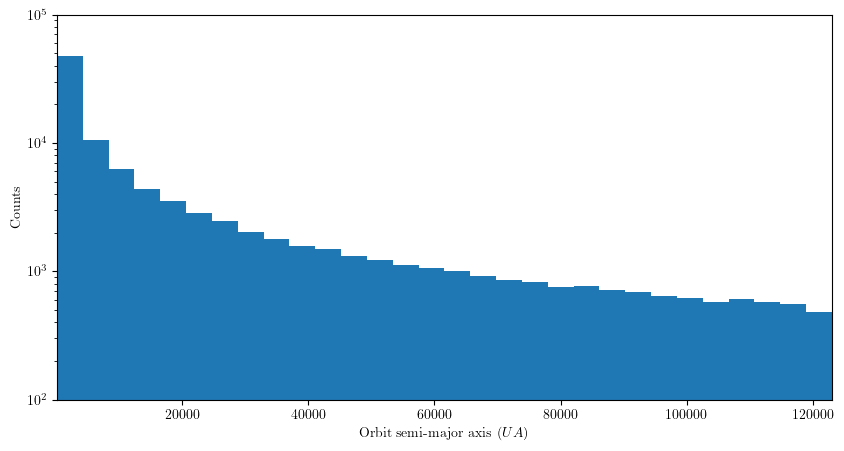

In [8]:
semi_axis = power.random_sample(200, 123759, size=data_length)
a = semi_axis
plot_histogram(
    a,
    bins=30,
    density=False,
    color=None,
    x_params={
        "label": "Orbit semi-major axis ($UA$)"
    },
    y_params={
        "limits": (100,100000),
        "scale": "log"
    },
    file="distributions_files/orbit_axis.png"
)

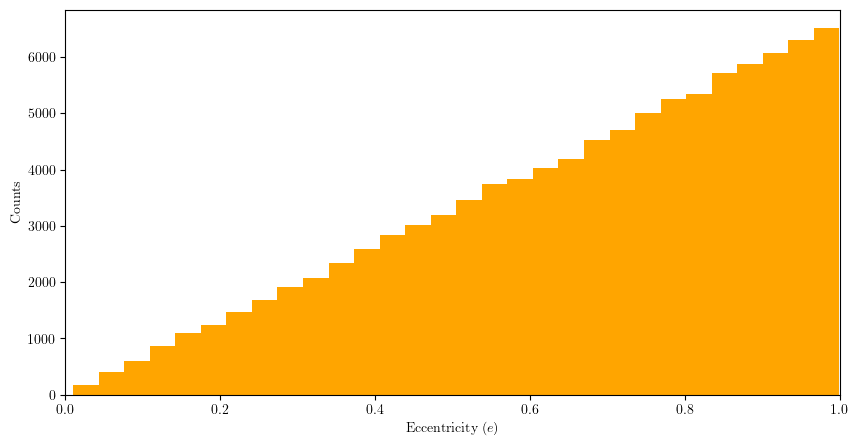

In [9]:
eccentricity = thermal.random_sample(0.001,0.999,size=data_length)
e = eccentricity
plot_histogram(
    e,
    bins=30,
    density=False,
    color="#ffa500",
    x_params={
        "label": "Eccentricity ($e$)",
        "limits": (0,1),
    },
    file="distributions_files/eccentricity.png"
)

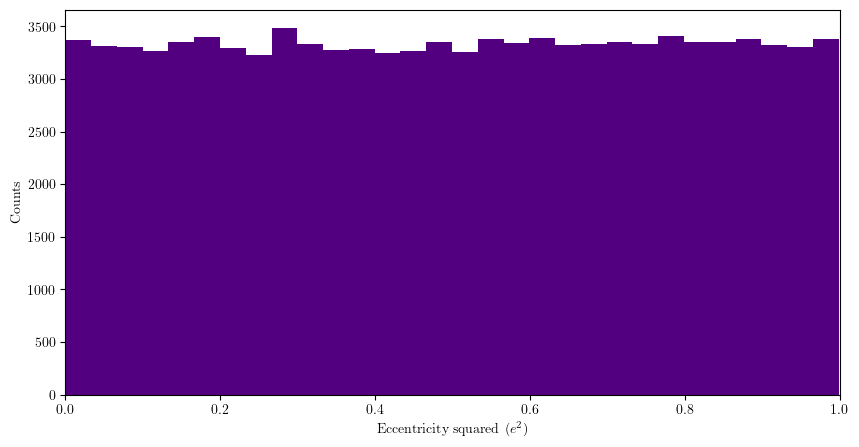

In [10]:
e2 = eccentricity**2
plot_histogram(
    e2,
    bins=30,
    density=False,
    color="#530080",
    x_params={
        "label": "Eccentricity squared ($e^2$)",
        "limits": (0,1),
    },
    file="distributions_files/eccentricity_squared.png"
)

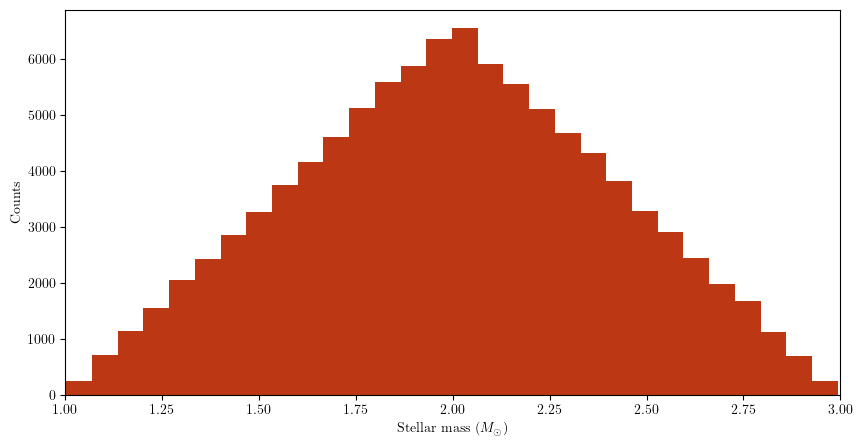

In [12]:
mass_1 = uniform.random_sample(0.5,1.5,size=data_length)
mass_2 = uniform.random_sample(0.5,1.5,size=data_length)
M = mass_1 + mass_2
plot_histogram(
    M,
    bins=30,
    density=False,
    color="#bc3713",
    x_params={
        "label": "Stellar mass ($M_\\odot$)",
        "limits": (1.0,3.0),
    },
    file="distributions_files/stellar_mass.png"
)

In [13]:
sine = Sine()

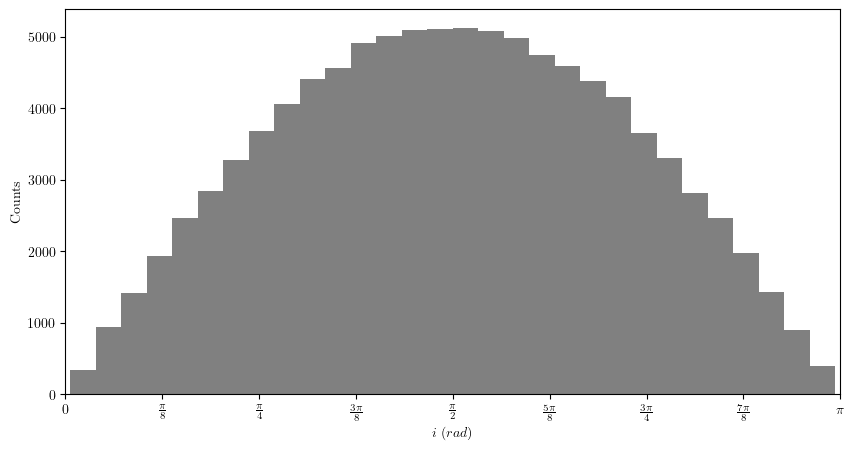

In [14]:
orbit_angle = sine.random_sample(0,np.pi,size=data_length)
i = orbit_angle
plot_histogram(
    i,
    bins=30,
    density=False,
    color="gray",
    x_params={
        "label": "$i$ ($rad$)",
        "limits": (0, np.pi)
    },
    pi_factor=8,
    file="distributions_files/orbit_angle.png"
)

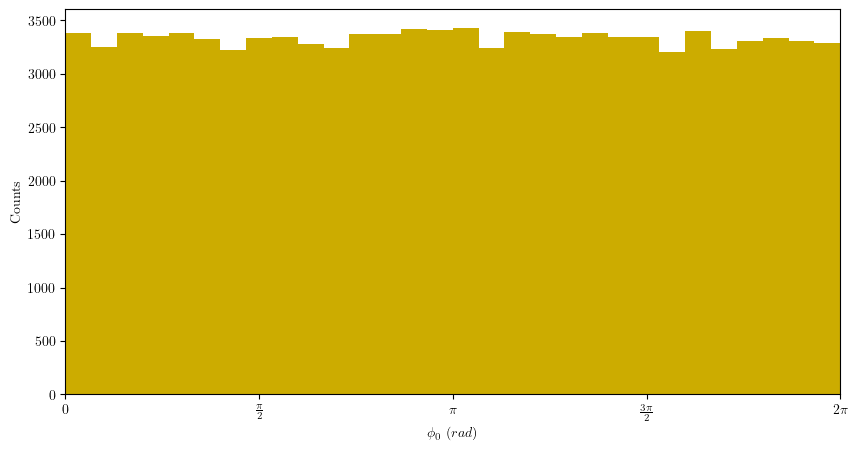

In [15]:
phi_0 = uniform.random_sample(0,2*np.pi,size=data_length)
plot_histogram(
    phi_0,
    bins=30,
    density=False,
    color="#ccac00",
    x_params={
        "label": "$\\phi_0$ ($rad$)",
        "limits": (0, 2*np.pi)
    },
    pi_factor=2,
    file="distributions_files/initial_phase_angle.png"
)

In [16]:
phi_angle = PhiAngle(
    dist_parameters={
        "e": eccentricity
    }
)

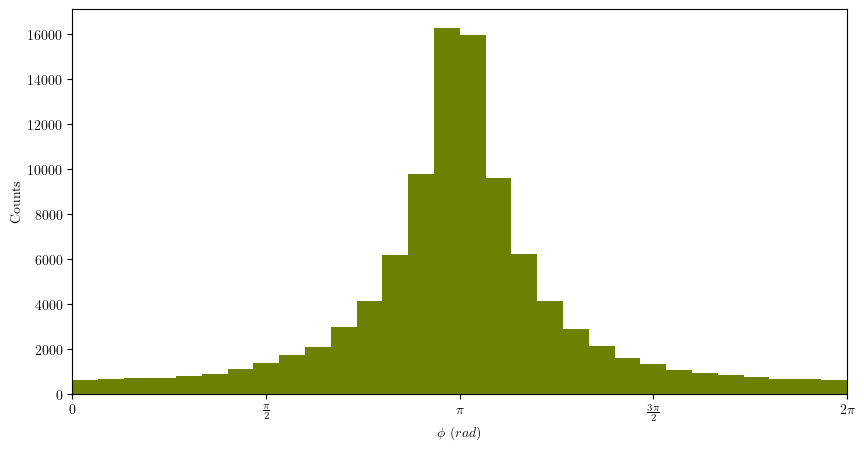

In [17]:
phase_angle = phi_angle.random_sample(0.0,2*np.pi,size=data_length)
phi = phase_angle
plot_histogram(
    phi,
    bins=30,
    density=False,
    color="#6d8000",
    x_params={
        "label": "$\phi$ ($rad$)",
        "limits": (0,2*np.pi)
    },
    pi_factor=2,
    file="distributions_files/phase_angle.png"
)

In [18]:
alpha_angle = AlphaAngle(
    dist_parameters={
        "e": eccentricity
    }
)

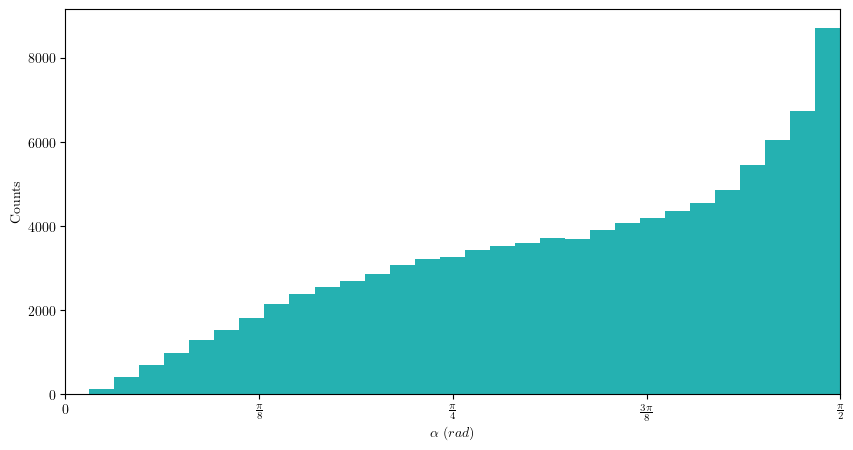

In [19]:
vr_angle = alpha_angle.distribution(phi,e)
alpha = vr_angle
plot_histogram(
    alpha,
    bins=30,
    density=False,
    color="#25b1b1",
    x_params={
        "label": "$\\alpha$ ($rad$)",
        "limits": (0,np.pi/2)
    },
    pi_factor=8,
    file="distributions_files/angle_vr.png"
)

In [20]:
r2D_proj = Distance2D(
    dist_parameters={
        "a": a,
        "phi": phi,
        "e": eccentricity,
        "i": i,
        "phi_0": phi_0,
    }
)

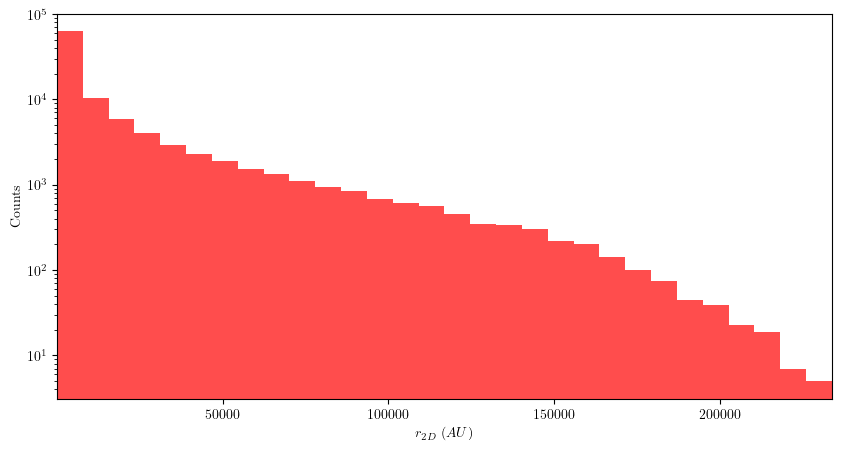

In [21]:
r2D = r2D_proj.distribution(a, phi, e, i, phi_0)
plot_histogram(
    r2D,
    bins=30,
    density=False,
    color="#ff4d4d",
    x_params={
        "label": "$r_{2D}$ $(AU)$"
    },
    y_params={
        "scale": "log"
    },
    file="distributions_files/r2d.png"
)

In [22]:
v2D_proj = Velocity2D(
    dist_parameters={
        "a": a,
        "M": M,
        "phi": phi,
        "e": eccentricity,
        "i": i,
        "phi_0": phi_0,
        "alpha": alpha,
    }
)

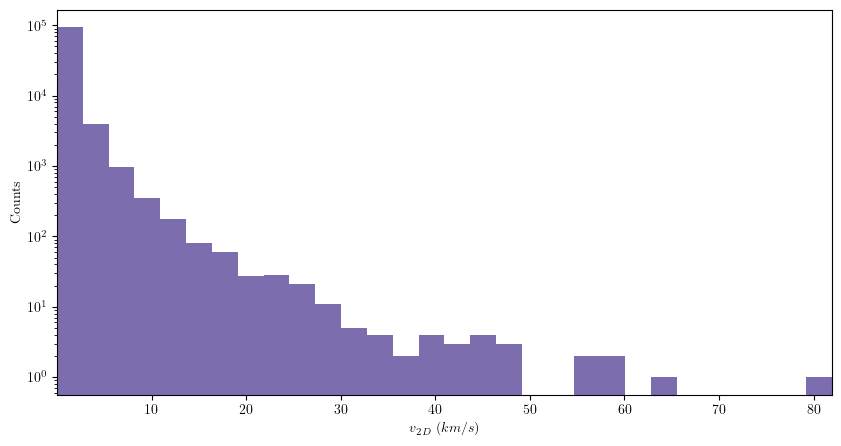

In [23]:
v2D = v2D_proj.distribution(a, M, phi, e, i, phi_0, alpha)
plot_histogram(
    v2D,
    bins=30,
    density=False,
    color="#7c6eae",
    x_params={
        "label":"$v_{2D}$ $(km/s)$"
    },
    y_params={
        "scale": "log"
    },
    file="distributions_files/v2d.png"
)

In [25]:
results = {
    "mass_1": list(mass_1),
    "mass_2": list(mass_2),
    "total_mass": list(M),
    "r2D": list(r2D),
    "v2D": list(v2D),
    "v2D_plus_error": list(v2D + np.random.normal(np.mean(v2D), 0.3/7.5, len(v2D)))
}

In [28]:
json.dump(results, open("./results.json", "w"), indent=4)

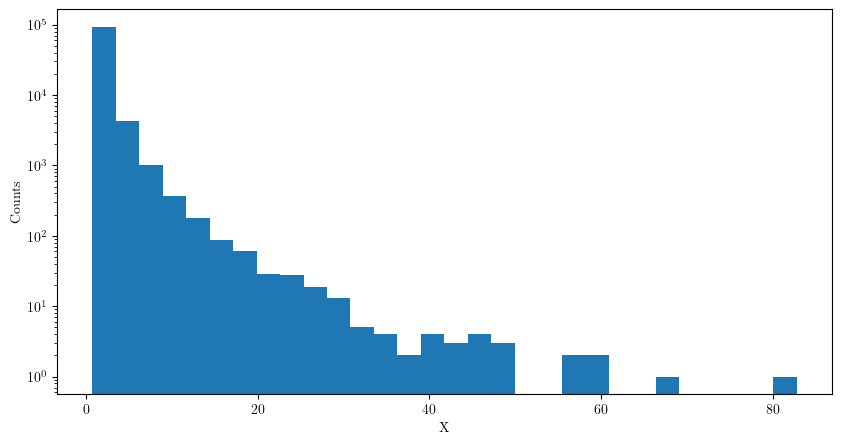

In [27]:
plot_histogram(results["v2D_plus_error"], y_params={"scale":"log"})